# Analisis de atributos

In [271]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [12, 12]

In [12]:
data = pd.read_csv('../data/formatted_data.csv')
data = data.drop(['Unnamed: 0', 'id'], axis=1)

In [3]:
data.head()

,coordinates_x,coordinates_y,bus_code,line,time_stamp
0,-55.995388,-34.86011,252,863,2018-10-02T17:07:12
1,-55.995388,-34.86011,252,863,2018-10-02T17:07:27
2,-55.995388,-34.86011,252,863,2018-10-02T17:07:42
3,-55.995388,-34.86011,252,863,2018-10-02T17:07:57
4,-55.995388,-34.86011,252,863,2018-10-02T17:08:12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63939 entries, 0 to 63938
Data columns (total 5 columns):
coordinates_x    63939 non-null float64
coordinates_y    63939 non-null float64
bus_code         63939 non-null int64
line             63939 non-null int64
time_stamp       63939 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ MB


In [5]:
data.time_stamp = data.time_stamp.apply(lambda t: datetime.strptime(t,'%Y-%m-%dT%H:%M:%S'))

In [6]:
data.head()

,coordinates_x,coordinates_y,bus_code,line,time_stamp
0,-55.995388,-34.86011,252,863,2018-10-02 17:07:12
1,-55.995388,-34.86011,252,863,2018-10-02 17:07:27
2,-55.995388,-34.86011,252,863,2018-10-02 17:07:42
3,-55.995388,-34.86011,252,863,2018-10-02 17:07:57
4,-55.995388,-34.86011,252,863,2018-10-02 17:08:12


In [193]:
buses = data.bus_code
unique_buses = np.unique(buses)
del buses
unique_buses
bus_data = pd.DataFrame(data[data.bus_code == unique_buses[0]])
bus_data

,coordinates_x,coordinates_y,bus_code,line,time_stamp
1124,-56.044445,-34.776222,2,2409,2018-10-02T16:54:41
1125,-56.044525,-34.776417,2,2408,2018-10-02T16:41:56
1126,-56.044525,-34.776417,2,2408,2018-10-02T16:42:41
1127,-56.044525,-34.776417,2,2408,2018-10-02T16:42:56
1128,-56.044525,-34.776417,2,2408,2018-10-02T16:43:11
1129,-56.044525,-34.776417,2,2408,2018-10-02T16:43:26
1130,-56.044525,-34.776417,2,2408,2018-10-02T16:43:41
1131,-56.044525,-34.776417,2,2408,2018-10-02T16:43:56
1132,-56.044556,-34.776165,2,2409,2018-10-02T16:54:56
1133,-56.044556,-34.776165,2,2409,2018-10-02T16:55:11


In [187]:
def bus_moving(df_t0, df_t1):
    if(df_t0.bus_code == df_t1.bus_code):
        return different_coordinates(df_t0, df_t1)
    return None

def is_different_bus(df_t0, df_t1):
    if(df_t0.bus_code == df_t1.bus_code):
        return False
    return True

def different_coordinates(df_t0, df_t1):
    d0 = df_t0.coordinates_x - df_t1.coordinates_x
    d1 = df_t0.coordinates_y - df_t1.coordinates_y
    if d0 == 0 and d1 ==0:
        return False
    return True

In [188]:
new_data = pd.DataFrame()
OO = []
for bus in unique_buses:
    bus_data = pd.DataFrame(data[data.bus_code == bus])
    row_cache = data.iloc[0]
    buses = defaultdict(list)
    moving = []
    row_cache = bus_data.iloc[0]
    for index, row in bus_data.iterrows():
        is_moving = different_coordinates(row_cache, row)
        if is_moving:
            moving.append(str(row.time_stamp)+'#'+str(row_cache.time_stamp))
        else:
            moving.append('-')
        row_cache = row
    bus_data['time'] = moving
    bus_data = bus_data[bus_data.coordinates_x != 0]
    OO.append([bus_data.coordinates_x,bus_data.coordinates_y])
#     plt.xticks(rotation=90)

IndexError: single positional indexer is out-of-bounds

In [189]:
noop = 1
for bus in OO:
    if noop == 0:
        break
    noop -=1
    ax = sns.pointplot(x=bus[0], y=bus[1],color='r')

KeyboardInterrupt: 

ValueError: object too deep for desired array

<Figure size 720x720 with 1 Axes>

In [ ]:
print(len(bus_data))
bus_data = bus_data[bus_data.coordinates_x != 0]
ax = sns.pointplot(x="coordinates_x", y="coordinates_y", data=bus_data, color='r')
plt.xticks(rotation=90)

In [122]:
row_cache = data.iloc[0]
buses = defaultdict(list)

for index, row in data.iterrows():
    if is_different_bus(row_cache, row):
        buses[row.bus_code] = [row]
    else:
        buses[row.bus_code].append(row)
    row_cache = row

In [125]:
buses[10]

[coordinates_x               -56.2242
 coordinates_y               -34.8564
 bus_code                          10
 line                             218
 time_stamp       2018-10-02 17:10:12
 id                                10
 Name: 61370, dtype: object]

In [95]:
df_t0 = data.iloc[0]
df_t1 = data.iloc[1]
bus_not_moving(df_t0,df_t1)

True

In [97]:
row_cache = data.iloc[0]
for index, row in data.iterrows():
    is_moving = bus_moving(row_cache, row)
    if is_moving == None:
        moving.append('+')
    elif is_moving:
        moving.append(str(row.time_stamp)+'#'+str(row_cache.time_stamp))
    else:
        moving.append('-')
    row_cache = row
data['time'] = moving

In [98]:
data.head(50)

,coordinates_x,coordinates_y,bus_code,line,time_stamp,id,time
0,-55.995388,-34.86011,252,863,2018-10-02 17:07:12,252,-
1,-55.995388,-34.86011,252,863,2018-10-02 17:07:27,252,-
2,-55.995388,-34.86011,252,863,2018-10-02 17:07:42,252,-
3,-55.995388,-34.86011,252,863,2018-10-02 17:07:57,252,-
4,-55.995388,-34.86011,252,863,2018-10-02 17:08:12,252,-
5,-55.995388,-34.86011,252,863,2018-10-02 17:08:27,252,-
6,-55.995388,-34.86011,252,863,2018-10-02 17:08:42,252,-
7,-55.995388,-34.86011,252,863,2018-10-02 17:08:57,252,-
8,-55.995388,-34.86011,252,863,2018-10-02 17:09:12,252,-
9,-55.995388,-34.86011,252,863,2018-10-02 17:09:27,252,-


In [14]:
data.head()

,coordinates_x,coordinates_y,bus_code,line,time_stamp
0,-55.995388,-34.86011,252,863,2018-10-02T17:07:12
1,-55.995388,-34.86011,252,863,2018-10-02T17:07:27
2,-55.995388,-34.86011,252,863,2018-10-02T17:07:42
3,-55.995388,-34.86011,252,863,2018-10-02T17:07:57
4,-55.995388,-34.86011,252,863,2018-10-02T17:08:12


In [19]:
data.coordinates_x.min()

-56.25588199999999

In [21]:
print('Min x: {0}\nMax x: {1}\nMin y: {2}\nMax y: {3}'.format(data.coordinates_x.min(),
                                                             data.coordinates_x.max(),
                                                             data.coordinates_y.min(),
                                                             data.coordinates_y.max()))

Min x: -56.25588199999999
Max x: 0.0
Min y: -34.928585
Max y: 0.0


In [25]:
data = data.query('coordinates_x != 0 & coordinates_y != 0')
min_x = data.coordinates_x.min()
max_x = data.coordinates_x.max()
min_y = data.coordinates_y.min()
max_y = data.coordinates_y.max()
print('Min x: {0}\nMax x: {1}\nMin y: {2}\nMax y: {3}'.format(min_x,
                                                              max_x,
                                                              min_y,
                                                              max_y))

Min x: -56.25588199999999
Max x: -55.995388
Min y: -34.928585
Max y: -34.720806


In [83]:
step = 0.01
longitude = np.arange(min_y, max_y, step)
latitude  = np.arange(min_x, max_x, step)
print('Matrix ({0}x{1})'.format(len(latitude),len(longitude)))
matrix = pd.DataFrame(columns=['latitude','longitude'])
points_lat = []
points_lon = []
for lon in latitude:
    for lat in longitude:
        points_lat.append(lat)
        points_lon.append(lon)
matrix.latitude  = points_lat
matrix.longitude = points_lon

Matrix (27x21)


-34.928585 , -56.25588199999999
-34.928585 , -56.245881999999995
-34.928585 , -56.235882
-34.928585 , -56.225882
-34.928585 , -56.215882
-34.928585 , -56.205882
-34.928585 , -56.195882000000005
-34.928585 , -56.18588200000001
-34.928585 , -56.17588200000001
-34.928585 , -56.16588200000001
-34.928585 , -56.15588200000001
-34.928585 , -56.145882000000015
-34.928585 , -56.13588200000002
-34.928585 , -56.12588200000002
-34.928585 , -56.11588200000002
-34.928585 , -56.10588200000002
-34.928585 , -56.095882000000024
-34.928585 , -56.085882000000026
-34.928585 , -56.07588200000003
-34.928585 , -56.06588200000003
-34.928585 , -56.05588200000003
-34.928585 , -56.045882000000034
-34.928585 , -56.035882000000036
-34.928585 , -56.02588200000004
-34.928585 , -56.01588200000004
-34.928585 , -56.00588200000004
-34.928585 , -55.995882000000044


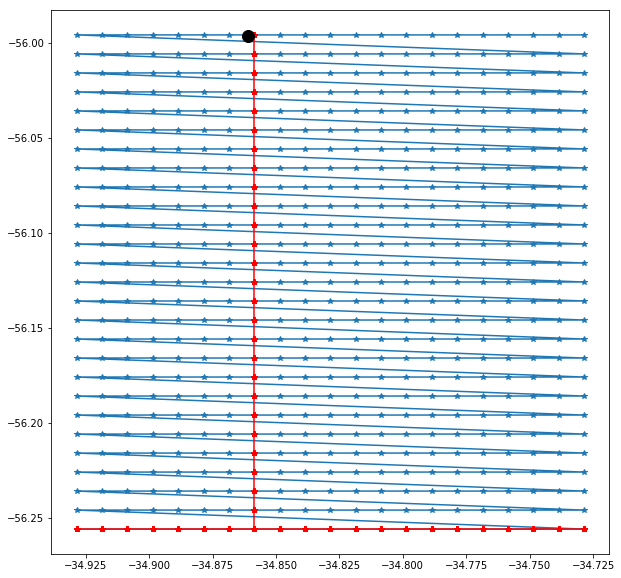

In [145]:
plt.plot(matrix.latitude, matrix.longitude,'-*')
plt.plot([matrix.latitude.iloc[7]]*len(matrix.longitude), matrix.longitude,'-*',c='r')
plt.plot(matrix.latitude, [matrix.longitude.iloc[0]]*len(matrix.latitude),'-*',c='r')


plt.plot(-34.86089,-55.996693,'o',c='k',markersize=12)
for i, r in matrix.iterrows():
    if i%21 ==0:
        print(r.latitude,',', r.longitude)

In [268]:
def print_base():
    plt.plot(matrix.latitude, matrix.longitude,'o', c='b')
    
def print_section(position, section):
    plt.text(position[1]+0.001,position[0]-0.005, '({0},{1})'.format(section[0],section[1]), fontsize=9, color='k')
    plt.plot(position[1]+0.005,position[0]-0.005,'s',c='r', markersize= 20)

def get_matrix_position(latitude_0, longitude_0,latitude_1, longitude_1):
    latitude  = latitude_0  + abs(latitude_0  - latitude_1) /2
    longitude = longitude_0 + abs(longitude_0 - longitude_1)/2
    position = [None, None]
    section  = [None, None]
    for index, long in matrix.iterrows():
        if position[0] == None and longitude <= matrix.longitude.iloc[index]:
            position[0] = matrix.longitude.iloc[index]
            section[0]  = 26-(index//21)
#             print(str(longitude)+' >= '+ str(matrix.longitude.iloc[index]))
        if position[1] == None and latitude <= matrix.latitude.iloc[index]:
            position[1] = matrix.latitude.iloc[index]
            section[1]  = index
#             print(str(latitude)+' >= '+ str(matrix.latitude.iloc[index]))
    print_base()
    print_section(position, section)
    return section

[0, 7]

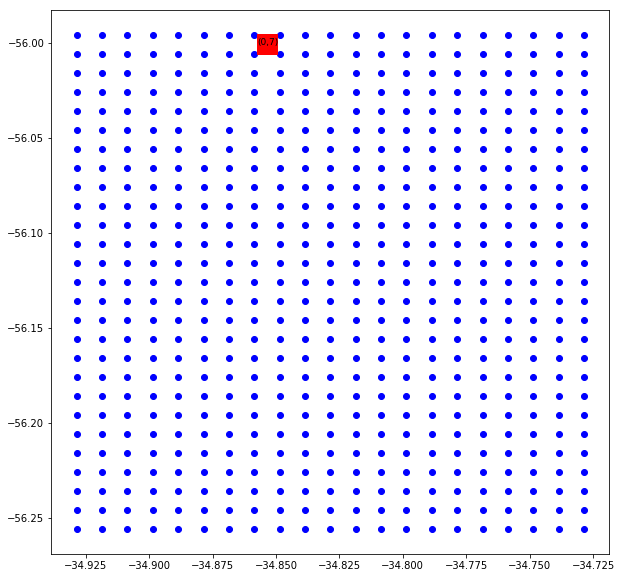

In [269]:
get_matrix_position(-34.86089, -55.996693, -34.86089, -55.996693)

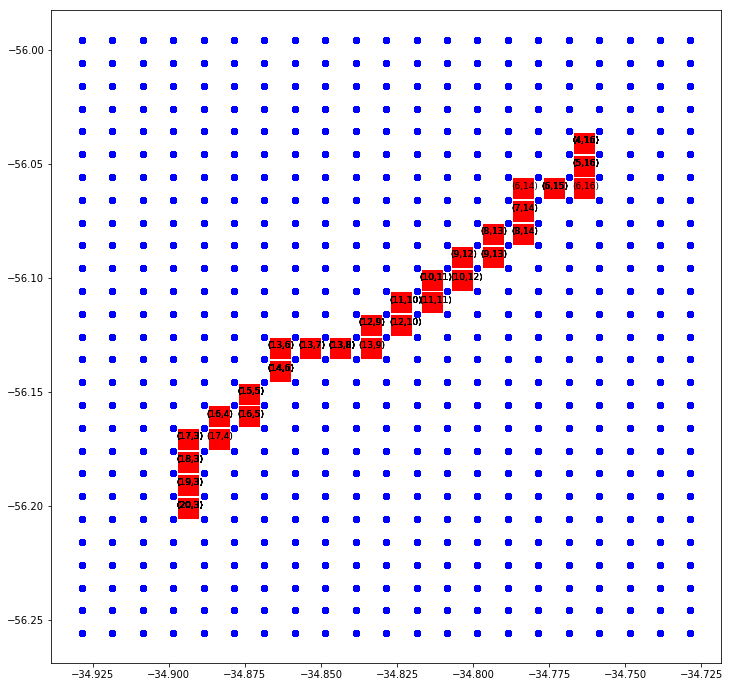

In [273]:
buses = data.bus_code
unique_buses = np.unique(buses)
del buses
unique_buses

bus_data = pd.DataFrame(data[data.bus_code == unique_buses[0]])

prev = bus_data.iloc[0]
positions = []
for index, current in bus_data.iterrows():
    if index == 0:
        continue
    position = get_matrix_position(prev.coordinates_y, prev.coordinates_x,
                        current.coordinates_y, current.coordinates_x)
    positions.append(position)
    prev = current

In [276]:
bus_data['matrix_position'] = positions

In [284]:
bus_data.count()

coordinates_x      344
coordinates_y      344
bus_code           344
line               344
time_stamp         344
matrix_position    344
dtype: int64

In [285]:
prev = bus_data.iloc[0]
index_to_delete = []
for index, current in bus_data.iterrows():
    if index == 0:
        continue
    if prev.coordinates_x == current.coordinates_x and\
       prev.coordinates_y == current.coordinates_y:
        index_to_delete.append(index)
    prev = current
bus_unique = pd.DataFrame(bus_data)
bus_unique.index.drop